### 1. Data Preprocessing

In [59]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.BRCA.sampleMap_BRCA_clinicalMatrix  TCGA.STAD.sampleMap_HiSeqV2_PANCAN
TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	 TCGA.STAD.sampleMap_STAD_clinicalMatrix
TCGA.SARC.sampleMap_HiSeqV2_PANCAN	 TCGA.THYM.sampleMap_HiSeqV2_PANCAN
TCGA.SARC.sampleMap_SARC_clinicalMatrix  TCGA.THYM.sampleMap_THYM_clinicalMatrix


In [60]:
!pip install sparse_lmm

In [61]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.THYM.sampleMap_THYM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.THYM.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [62]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_THYM_gistic2,_GENOMIC_ID_TCGA_THYM_gistic2thd,_GENOMIC_ID_data/public/TCGA/THYM/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_THYM_mutation_bcm_gene,_GENOMIC_ID_TCGA_THYM_miRNA_HiSeq,_GENOMIC_ID_TCGA_THYM_mutation_broad_gene,_GENOMIC_ID_TCGA_THYM_PDMRNAseq,_GENOMIC_ID_TCGA_THYM_RPPA,_GENOMIC_ID_TCGA_THYM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_THYM_mutation_bcgsc_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,47.0,TCGA-3G-AB0O-F72300,TCGA-3G-AB0O,...,TCGA-3G-AB0O-01A-22D-A422-01,TCGA-3G-AB0O-01A-22D-A422-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O-01A-22D-A423-09,TCGA-3G-AB0O-01,TCGA-3G-AB0O-01A-22D-A423-09,TCGA-3G-AB0O-01,D7DB095E-95C1-4525-A675-49F4531639BF,97e5882f-3128-4459-a965-ad78ac2a80b5,TCGA-3G-AB0O-01A-22D-A423-09
TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,66.0,TCGA-3G-AB0Q-F72301,TCGA-3G-AB0Q,...,TCGA-3G-AB0Q-01A-11D-A422-01,TCGA-3G-AB0Q-01A-11D-A422-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01A-11D-A423-09,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01A-11D-A423-09,TCGA-3G-AB0Q-01,B3ABB9DB-5885-4A89-85D5-D369E7B2F0D2,547745d8-27b5-4258-af92-fbdb3c127fc2,TCGA-3G-AB0Q-01A-11D-A423-09
TCGA-3G-AB0T-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,45.0,NaN,TCGA-3G-AB0T,...,TCGA-3G-AB0T-01A-11D-A422-01,TCGA-3G-AB0T-01A-11D-A422-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T-01A-11D-A423-09,TCGA-3G-AB0T-01,TCGA-3G-AB0T-01A-11D-A423-09,TCGA-3G-AB0T-01,73A7B579-E2B6-42FC-B488-9F724CFF8689,995ac810-e3a2-4a98-bf46-8f30a4107e45,TCGA-3G-AB0T-01A-11D-A423-09
TCGA-3G-AB14-01,TCGA-3G-AB14-01,TCGA-3G-AB14,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,51.0,TCGA-3G-AB14-F63587,TCGA-3G-AB14,...,TCGA-3G-AB14-01A-11D-A422-01,TCGA-3G-AB14-01A-11D-A422-01,TCGA-3G-AB14-01,TCGA-3G-AB14-01A-11D-A423-09,TCGA-3G-AB14-01,TCGA-3G-AB14-01A-11D-A423-09,TCGA-3G-AB14-01,09B20945-DE7A-4E76-ADA4-9D75F86940D5,16643812-d47d-47d5-8bde-05a401180f5a,TCGA-3G-AB14-01A-11D-A423-09
TCGA-3G-AB19-01,TCGA-3G-AB19-01,TCGA-3G-AB19,TCGA Thymoma (THYM),thymoma,Thymus,NO,YES,76.0,TCGA-3G-AB19-F72302,TCGA-3G-AB19,...,TCGA-3G-AB19-01A-21D-A422-01,TCGA-3G-AB19-01A-21D-A422-01,TCGA-3G-AB19-01,TCGA-3G-AB19-01A-21D-A423-09,TCGA-3G-AB19-01,TCGA-3G-AB19-01A-21D-A423-09,TCGA-3G-AB19-01,8C4EF0FF-4BCA-4DA9-B6AC-D43A2A409718,1e03a90c-3b11-491f-a81f-225452f70121,TCGA-3G-AB19-01A-21D-A423-09


In [63]:
gene_data.head()

,TCGA-ZB-A96P-01,TCGA-X7-A8M4-01,TCGA-4V-A9QI-01,TCGA-4V-A9QL-01,TCGA-X7-A8DE-01,TCGA-ZB-A963-01,TCGA-3T-AA9L-01,TCGA-4V-A9QW-01,TCGA-YT-A95E-01,TCGA-X7-A8DF-01,...,TCGA-XU-A936-01,TCGA-4V-A9QX-01,TCGA-ZB-A96R-01,TCGA-XM-A8RF-01,TCGA-XU-A92X-01,TCGA-XU-A92Z-01,TCGA-X7-A8D8-01,TCGA-XU-A92O-01,TCGA-X7-A8M8-01,TCGA-3G-AB14-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-3.952792,-2.710592,-2.658192,-1.949092,-2.566592,-1.340092,-4.687692,-2.824292,-2.933492,-2.281692,...,-0.433592,-2.130992,-3.203492,-2.074992,-0.554992,-1.729592,-1.611992,-2.749892,-3.345692,-0.743092
HIF3A,-2.926826,0.988674,2.026774,1.423074,-0.454626,-1.518126,-1.151126,-0.005526,-0.790726,-1.165326,...,2.699374,-0.981926,-3.038826,0.002074,-0.358526,-4.367826,1.148974,-0.370226,0.211474,3.065074
RNF17,-0.531035,-0.531035,-0.531035,-0.135935,-0.531035,-0.531035,1.505465,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,2.095865,-0.531035,-0.531035,-0.531035,-0.531035,0.972665
RNF10,0.084928,0.223228,0.005328,0.375828,0.101328,0.046028,-0.097572,0.063328,0.430128,0.137128,...,-0.325872,0.318028,0.226128,0.245028,-0.286672,-0.179472,0.055328,0.230928,0.202528,-0.045572
RNF11,-1.027578,-0.788978,-0.486978,-0.714478,-0.874578,-0.406978,-0.710078,-1.700678,-0.802178,-0.935578,...,-0.967978,-0.623478,-1.116278,0.097522,-0.775078,-0.076978,-0.316578,-0.656978,-1.091378,-0.621278


In [64]:

gene_fullname = 'THYM gene'
gene = 'thym'
condition = 'underweight'
condition_col = 'initial_weight'
trait = 'Thymoma'

col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 73 features, and the gene dataset includes 20530 genes


In [65]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,47.0,TCGA-3G-AB0O-F72300,TCGA-3G-AB0O,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,66.0,TCGA-3G-AB0Q-F72301,TCGA-3G-AB0Q,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,45.0,NaN,TCGA-3G-AB0T,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,TCGA-3G-AB14-01,TCGA-3G-AB14,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,51.0,TCGA-3G-AB14-F63587,TCGA-3G-AB14,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,TCGA-3G-AB19-01,TCGA-3G-AB19,TCGA Thymoma (THYM),thymoma,Thymus,NO,YES,76.0,TCGA-3G-AB19-F72302,TCGA-3G-AB19,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [66]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,240.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,50.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,180.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,110.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,210.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [67]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

<ipython-input-67-7cb2c537f127>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)


,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thymoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,240.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,50.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,180.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,110.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,210.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


In [68]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

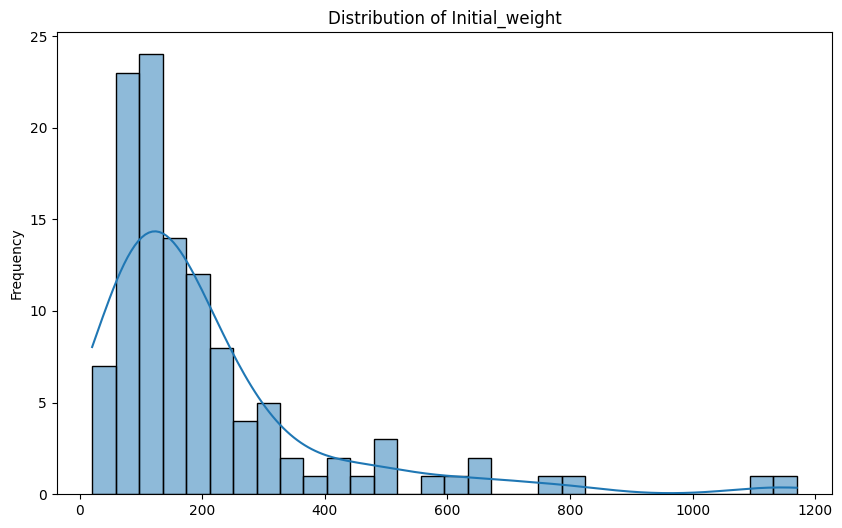

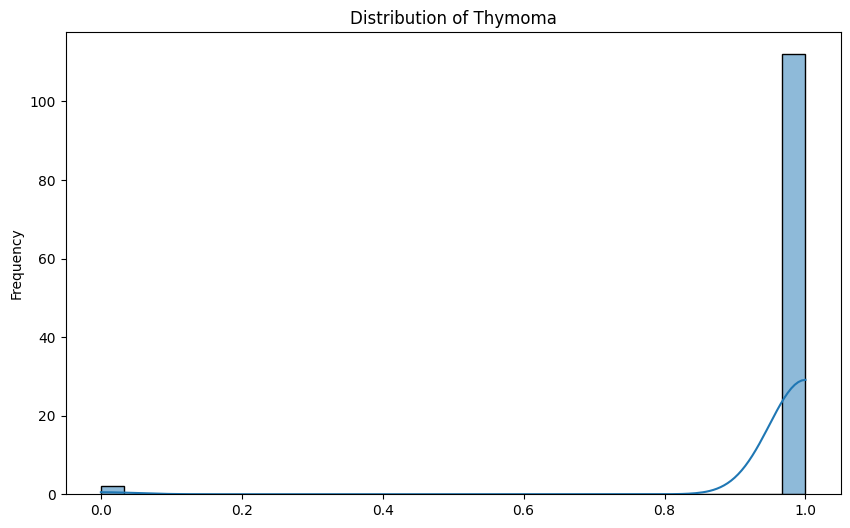

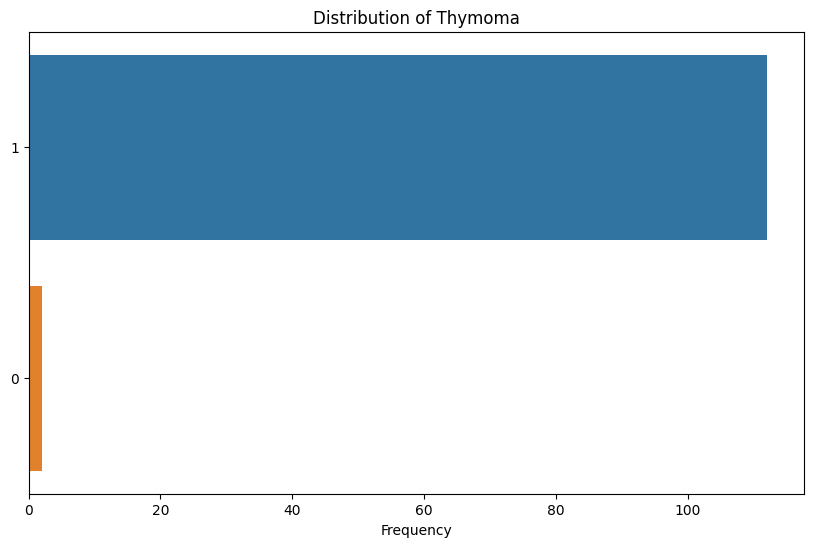

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

In [70]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thymoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


### 3. Do regression & Cross Validation

In [71]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-71-168e47ada711>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)


0.9454545454545455


In [72]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [73]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For thym:
Thymoma: Coefficient = 0.13128622409733134, p-value = 0.0

For underweight:
underweight: Coefficient = -0.006308618134165925, p-value = 0.4919189668717201



### 4. Discussion

In [74]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between THYM gene and Thymoma when considering the influence of underweight?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the THYM gene and Thymoma when considering the influence of underweight.

Alternative Hypothesis (H1): There is an association between the expression of the THYM gene and Thymoma when considering the influence of underweight.




In [75]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: Thymoma
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: underweight
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [76]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: Thymoma
Conclusion: H1 is confirmed: There is an association between the expression of the Thymoma and Thymoma when considering the influence of underweight.




